dataset: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

# Pipeline

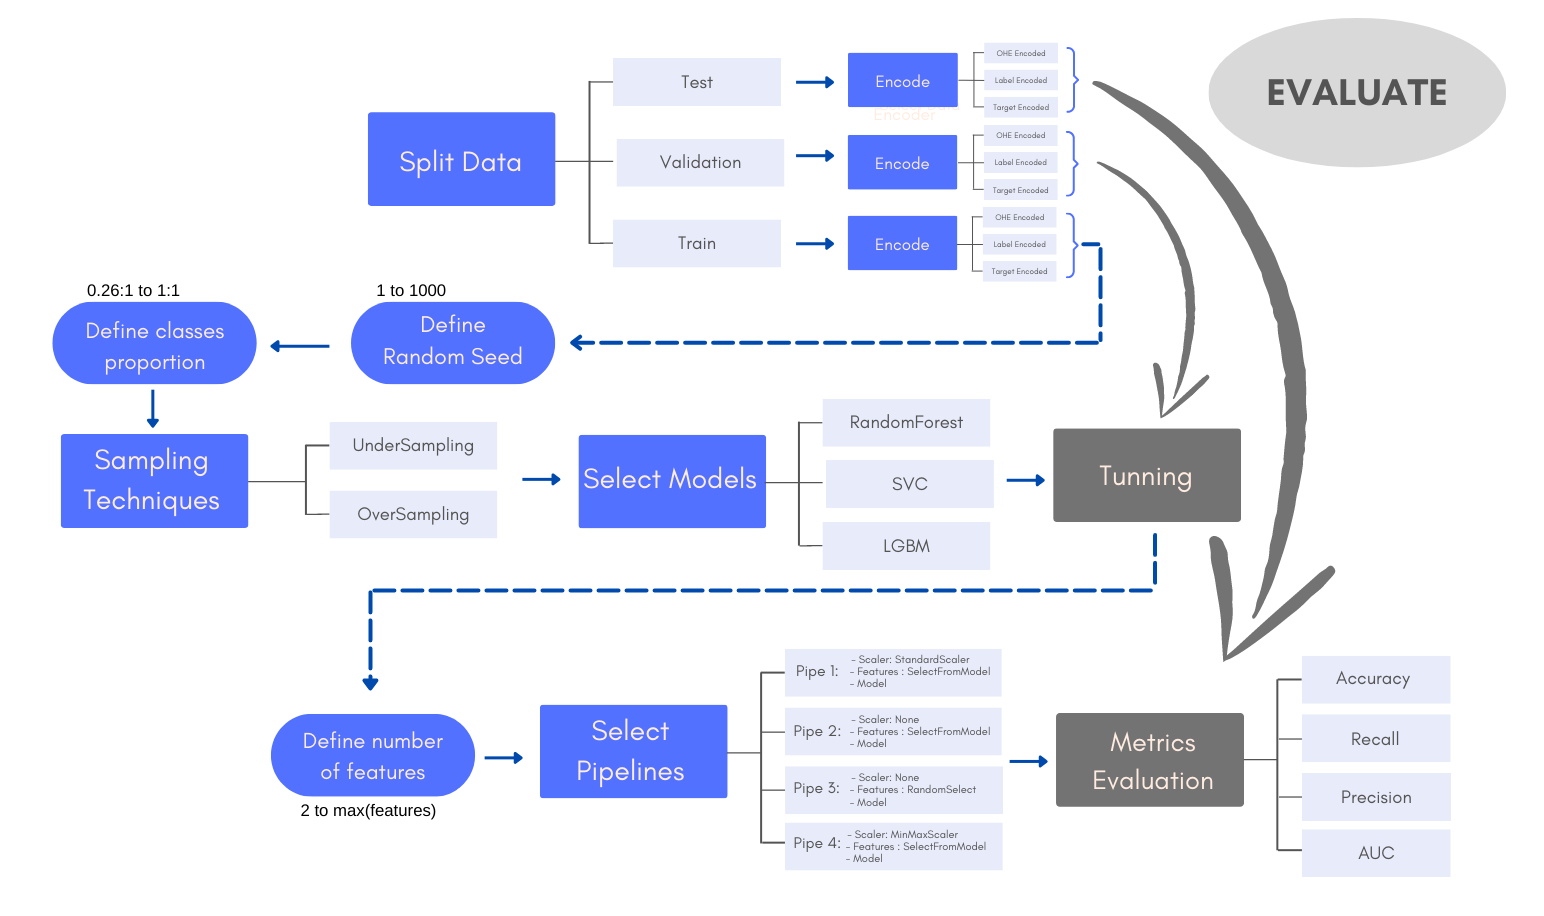

In [2]:
from IPython.display import Image
Image("Pipeline.png")

# 1 Import Bibliotecas

In [167]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport


#Visualização de dados
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

#Scalers e encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder


#Balanceamento de dados
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Prototipação
from lazypredict.Supervised import LazyClassifier


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import PredefinedSplit



#ML
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2 Leitura dos dados

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3 Limpeza

In [5]:
len(df)

10000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#df.profile_report()

## 3.1 Valores Unicos

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## 3.2 Valores faltantes

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 3.3 Valores duplicados

In [10]:
df.duplicated().sum()

0

## 3.4 Tipo de dados

In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# 4 Analise de dados

## 4.1 Dados categóricos ou Booleanos + Target Exited

In [12]:
df_categorical = df[['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']]

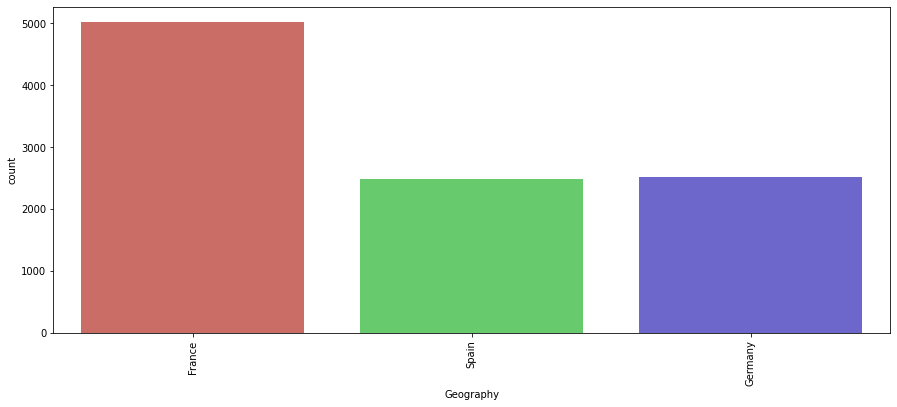

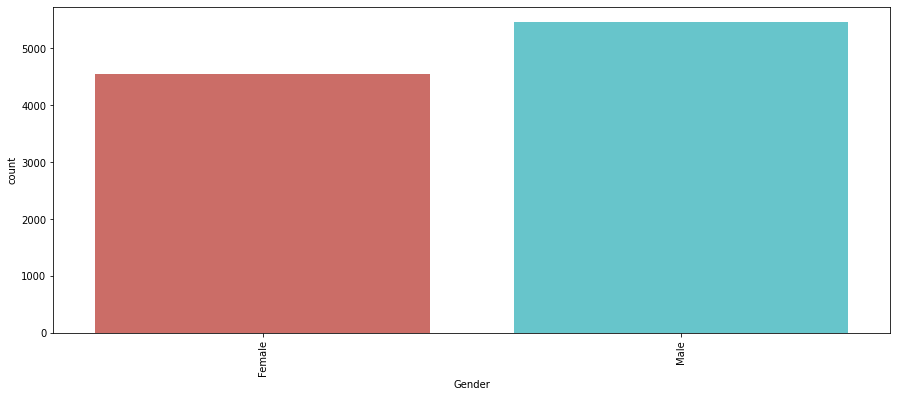

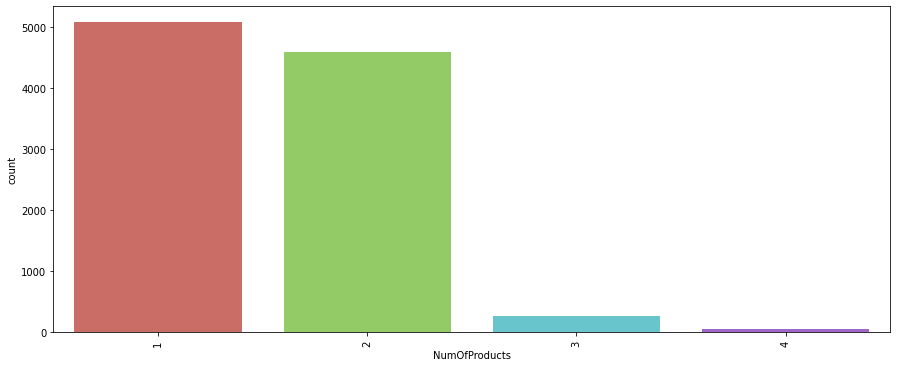

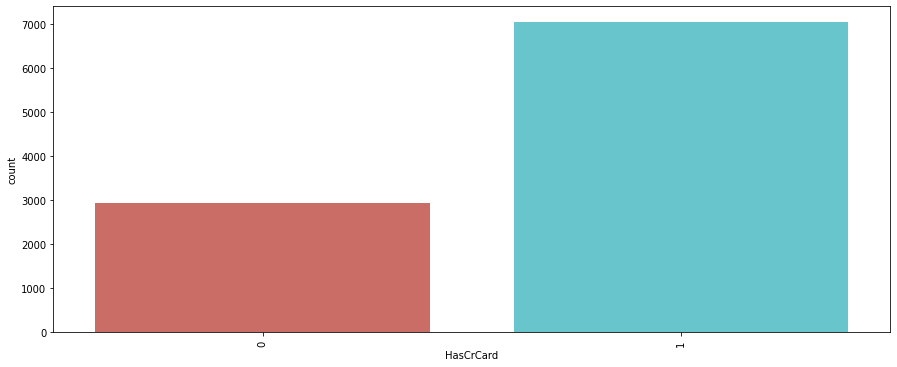

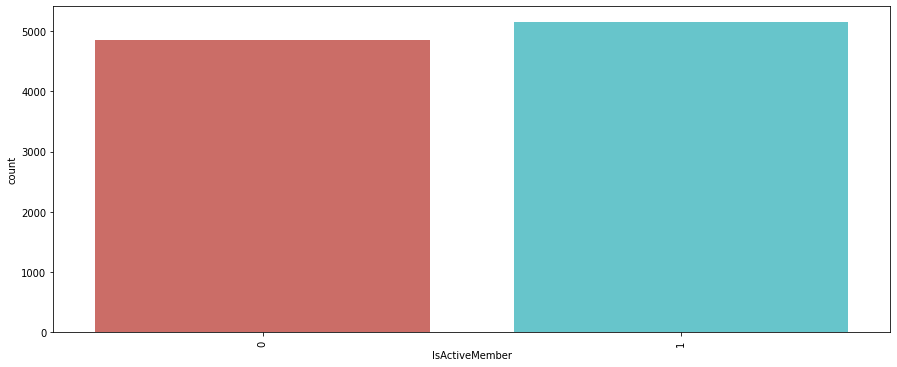

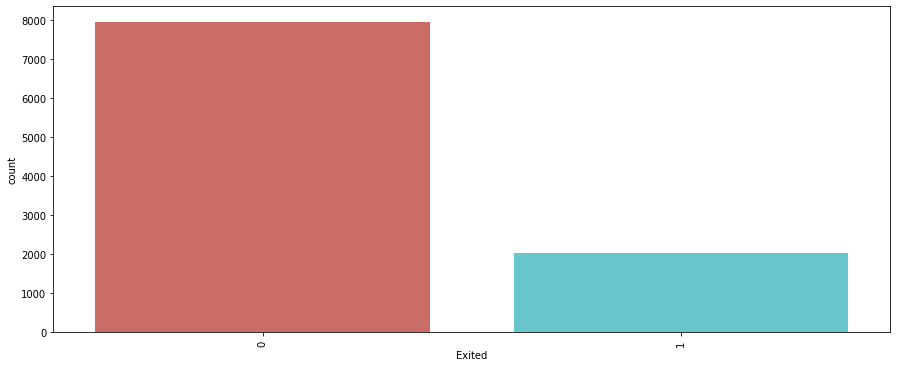

In [15]:
for i in df_categorical.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(df_categorical[i], data = df_categorical,
    palette='hls')
    plt.xticks(rotation = 90)
    plt.show()


In [15]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
df.Exited.value_counts()[1]/df.Exited.value_counts().sum()

0.2037

- Dos 10000 exemplos há cerca de 2000 de clientes que deram churn e 8000 que não deram, a base está desbalanceada!

## 4.2 Dados numéricos e/ou Continuos + Target Exited

In [17]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df_numerico = df[['CreditScore','Age','Tenure','Balance', 'EstimatedSalary','Exited']]

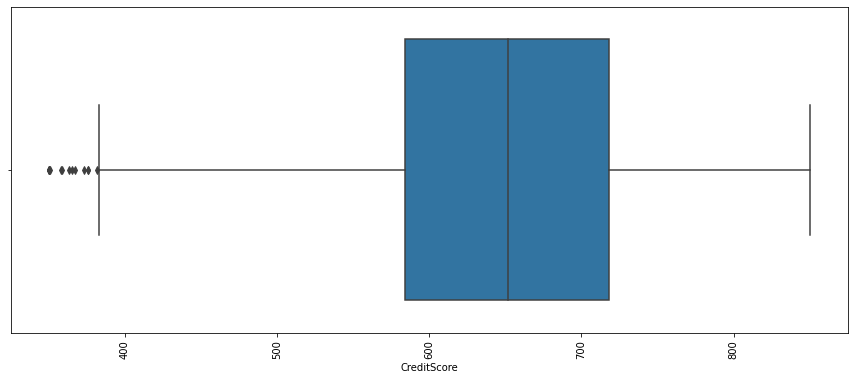

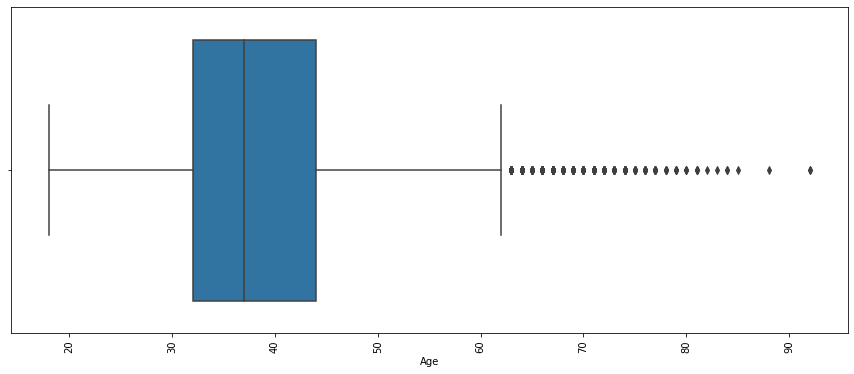

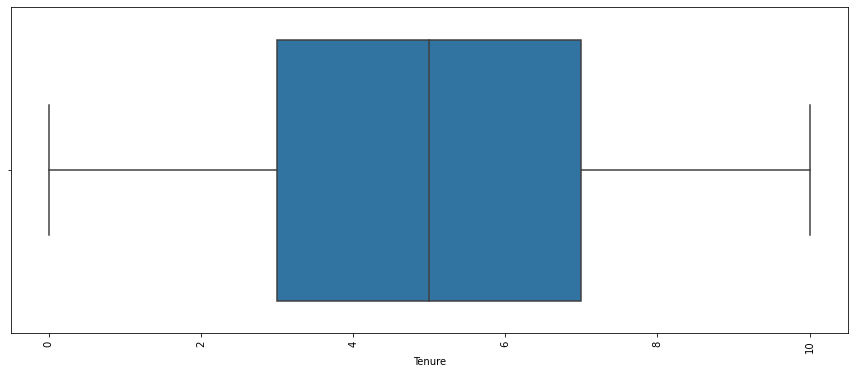

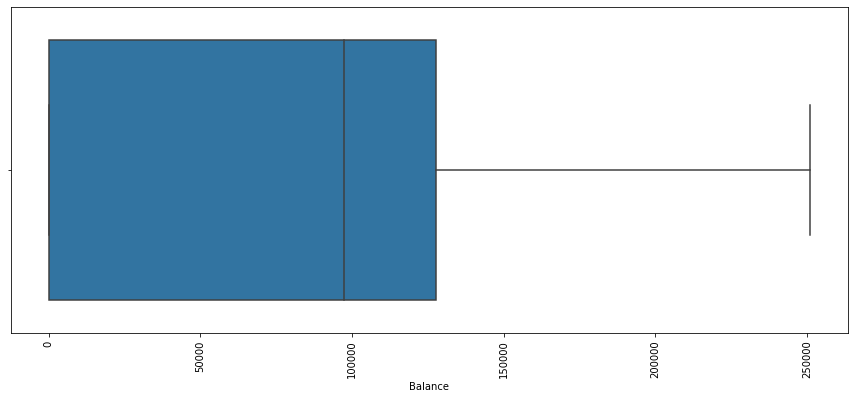

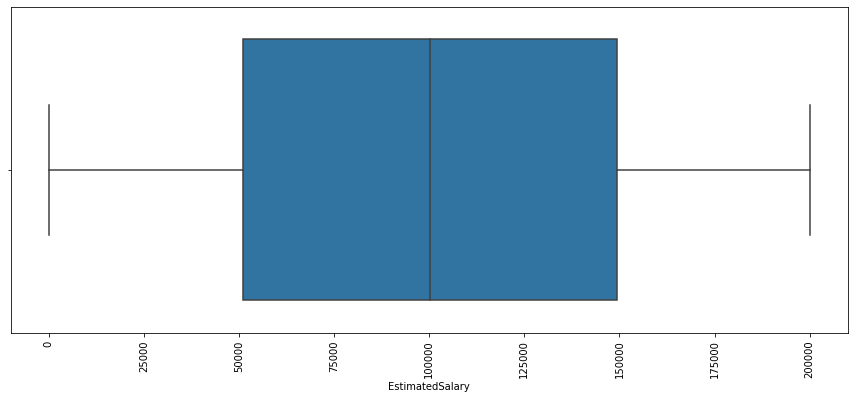

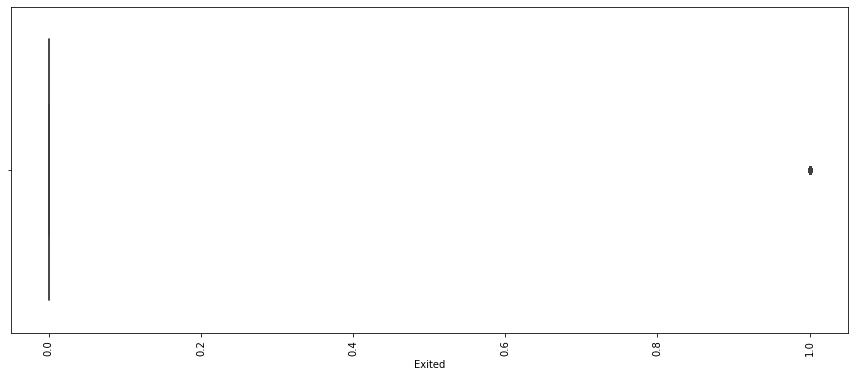

In [20]:
for i in df_numerico.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df[i], data = df)
    plt.xticks(rotation = 90)
    plt.show()

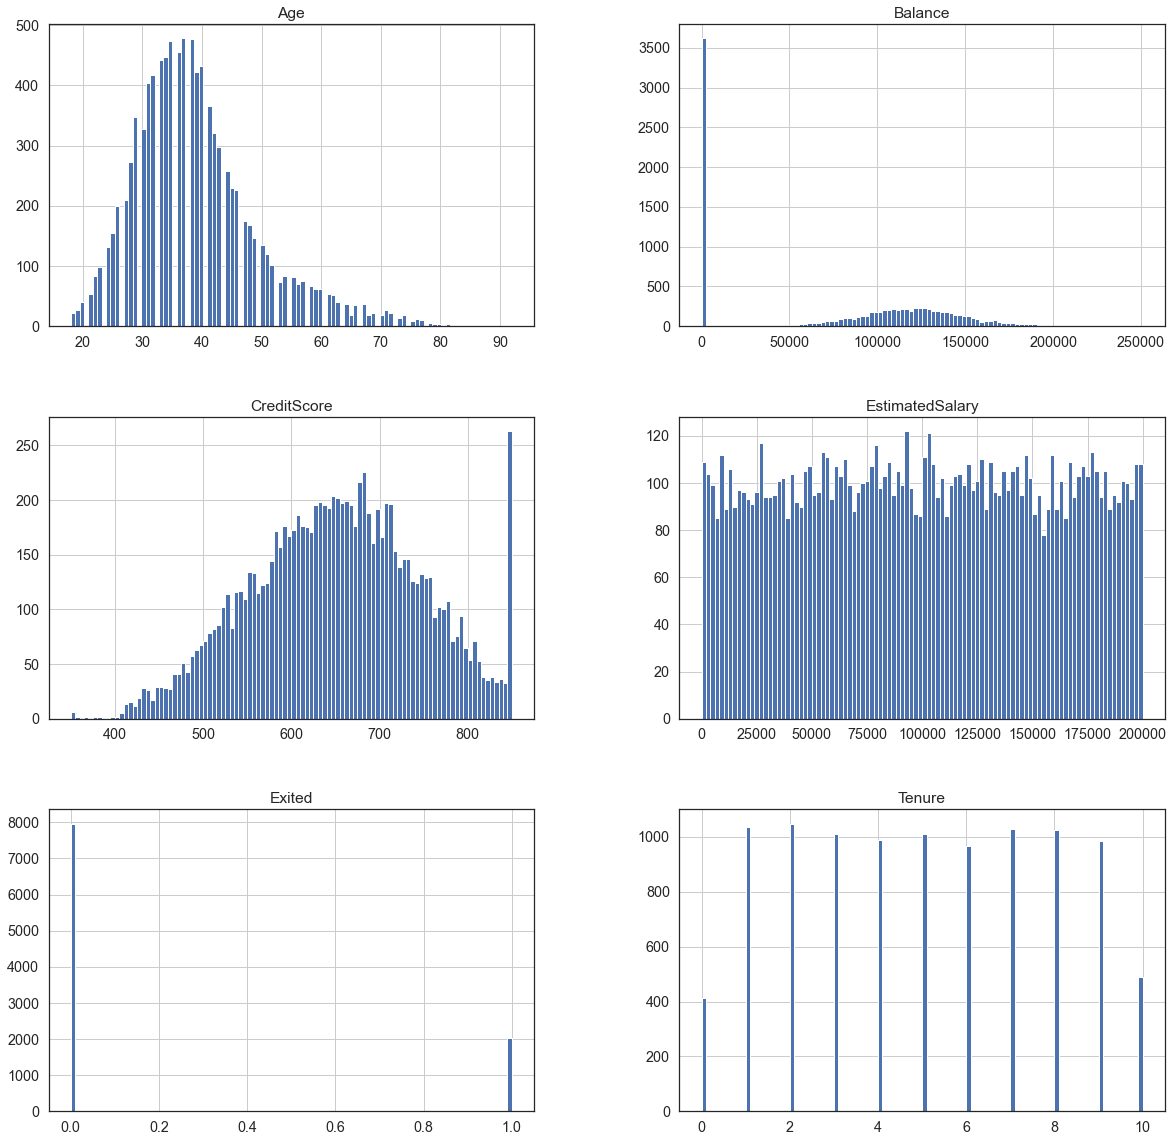

In [29]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df_numerico.hist(bins=100)

## 4.3 Analise Bivariada e Multivariada

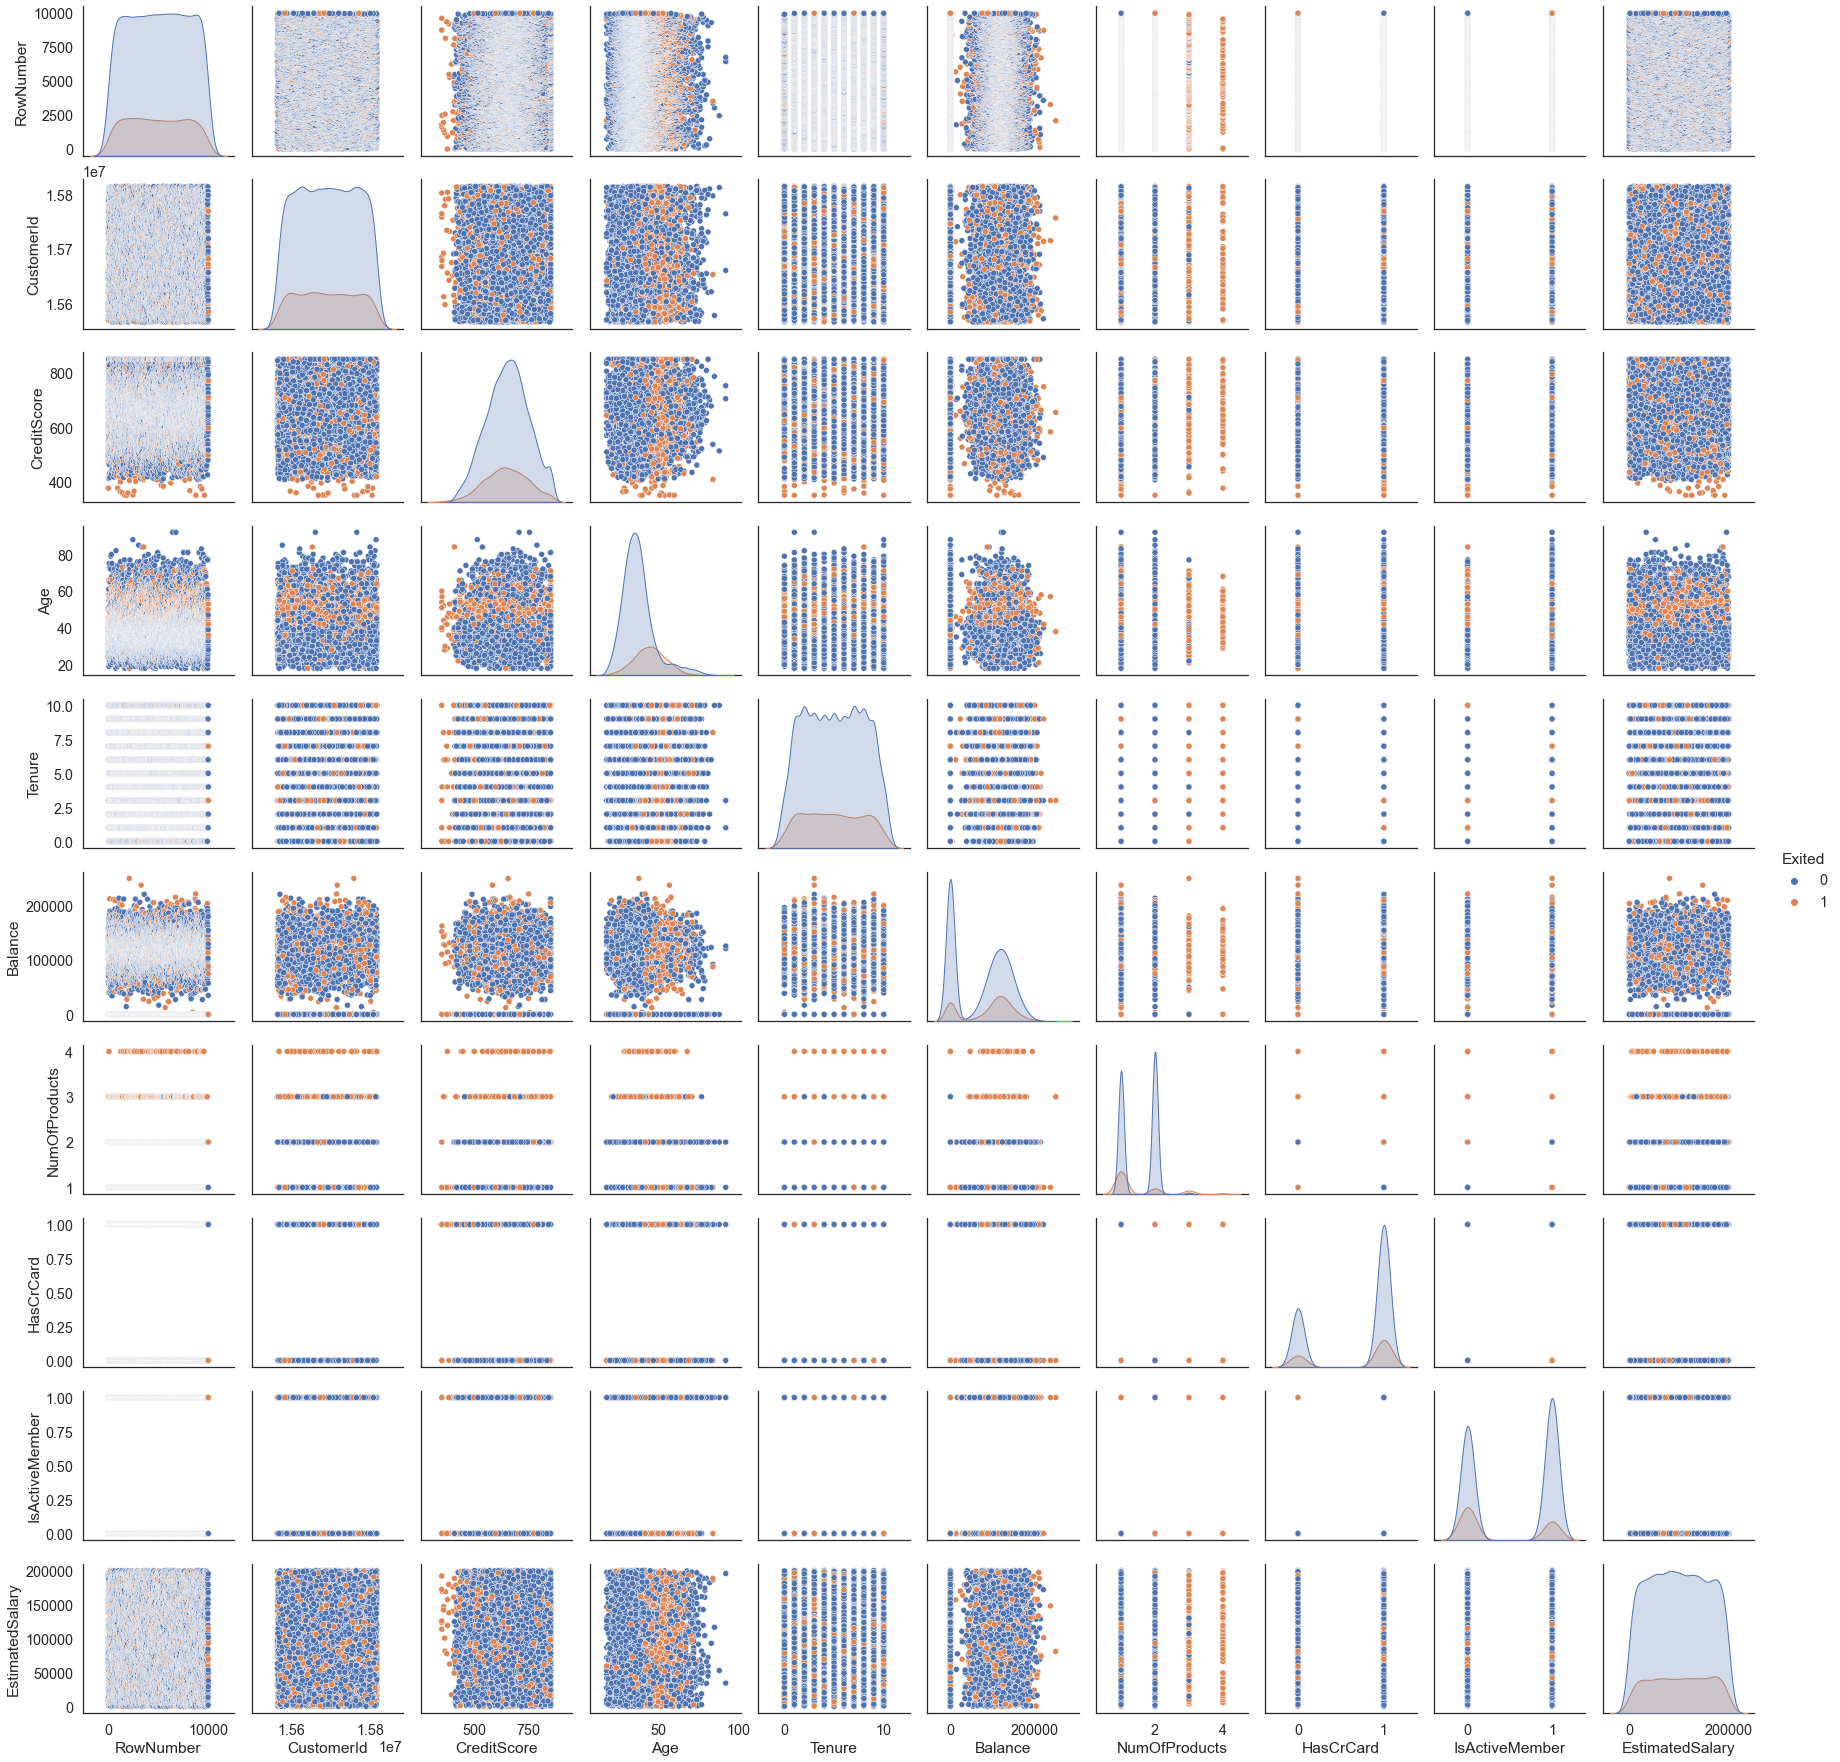

In [30]:
sns.pairplot(df, hue = 'Exited')
plt.show()

## 4.4 Hipoteses

### H1: Clientes ativos tendem a não dar churn - VERDADEIRO

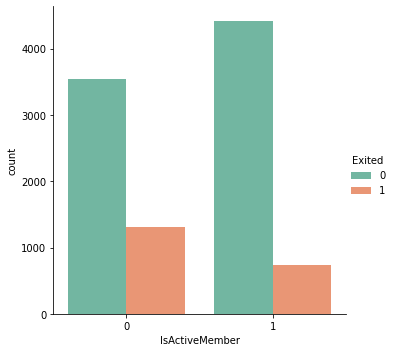

In [21]:
sns.catplot(x="IsActiveMember", kind="count", palette="Set2", data= df, hue = 'Exited')

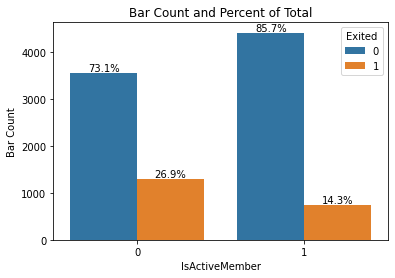

In [22]:
# plot
variavel_plot = 'IsActiveMember'
variavel_target = 'Exited'

ax = sns.countplot(x=variavel_plot, hue=variavel_target, data=df)
ax.set(ylabel='Bar Count', title='Bar Count and Percent of Total')

# add annotations
for k, c in enumerate(ax.containers):
    
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    #labels = [f'{h/df.Exited.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    lista_target_unico = sorted(df[variavel_target].unique(), reverse=False)
    lista_x_unico = sorted(df[variavel_plot].unique(), reverse=False)
    
    target = lista_target_unico[k]
    
    labels = []
    
    df_target_filtrado = df[(df[variavel_target]==target)]
    
    for p, i in enumerate(lista_x_unico):
        
        especifico = lista_x_unico[p]
            
        ocorrencias_total = df[(df[variavel_plot])==i][variavel_target].value_counts().sum()
        Exited_especifico = df_target_filtrado[(df_target_filtrado[variavel_plot])==i][variavel_target].value_counts().sum()
        labels.append(f'{Exited_especifico/ocorrencias_total*100:0.1f}%')
        
        
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

Quantitativamente há mais clientes ativos no banco, no entanto, proporcionalmente há maior taxa de churn entre os clientes não ativos

### H2: Clientes sem cartão de crédito tem maior predisposição a dar churn - VERDADEIRO

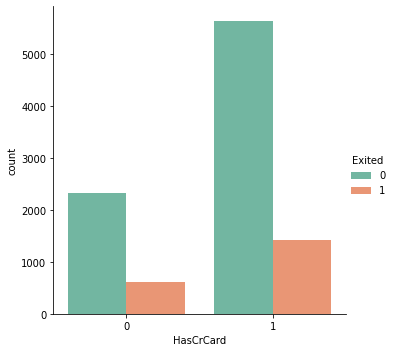

In [23]:
sns.catplot(x="HasCrCard", kind="count", palette="Set2", data= df, hue = 'Exited')

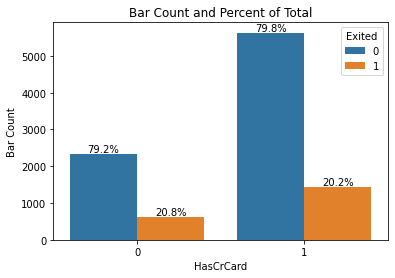

In [24]:
# plot
variavel_plot = 'HasCrCard'
variavel_target = 'Exited'

ax = sns.countplot(x=variavel_plot, hue=variavel_target, data=df)
ax.set(ylabel='Bar Count', title='Bar Count and Percent of Total')

# add annotations
for k, c in enumerate(ax.containers):
    
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    #labels = [f'{h/df.Exited.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    lista_target_unico = sorted(df[variavel_target].unique(), reverse=False)
    lista_x_unico = sorted(df[variavel_plot].unique(), reverse=False)
    
    target = lista_target_unico[k]
    
    labels = []
    
    df_target_filtrado = df[(df[variavel_target]==target)]
    
    for p, i in enumerate(lista_x_unico):
        
        especifico = lista_x_unico[p]
            
        ocorrencias_total = df[(df[variavel_plot])==i][variavel_target].value_counts().sum()
        Exited_especifico = df_target_filtrado[(df_target_filtrado[variavel_plot])==i][variavel_target].value_counts().sum()
        labels.append(f'{Exited_especifico/ocorrencias_total*100:0.1f}%')
        
        
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

Quantitativamente há mais clientes com cartão de crédito. Proporcionalmente há maior taxa de churn entre os membros não ativos 20,8% com relação aos membros ativos 20,2%.

### H3: O local de residência de clientes influencia no comportamento de churn - VERDADEIRO

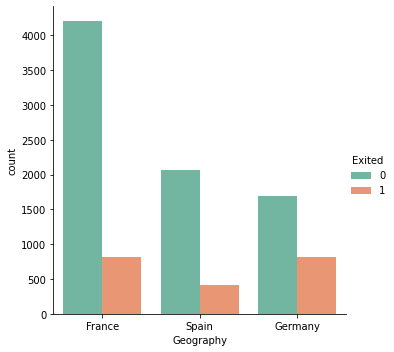

In [25]:
sns.catplot(x="Geography", kind="count", palette="Set2", data= df, hue = 'Exited')

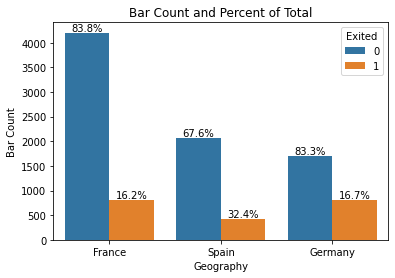

In [26]:
# plot
variavel_plot = 'Geography'
variavel_target = 'Exited'

ax = sns.countplot(x=variavel_plot, hue=variavel_target, data=df)
ax.set(ylabel='Bar Count', title='Bar Count and Percent of Total')

# add annotations
for k, c in enumerate(ax.containers):
    
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    #labels = [f'{h/df.Exited.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    lista_target_unico = sorted(df[variavel_target].unique(), reverse=False)
    lista_x_unico = sorted(df[variavel_plot].unique(), reverse=False)
    
    target = lista_target_unico[k]
    
    labels = []
    
    df_target_filtrado = df[(df[variavel_target]==target)]
    
    for p, i in enumerate(lista_x_unico):
        
        especifico = lista_x_unico[p]
            
        ocorrencias_total = df[(df[variavel_plot])==i][variavel_target].value_counts().sum()
        Exited_especifico = df_target_filtrado[(df_target_filtrado[variavel_plot])==i][variavel_target].value_counts().sum()
        labels.append(f'{Exited_especifico/ocorrencias_total*100:0.1f}%')
        
        
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

Embora quantitativamente a Espanha represente o segundo maior pais em número de clientes é onde se localiza a maior taxa de churn (32,4%) em sua base de clientes em comparação aos outros dois países França (16,2%) e Alemanha (16,7%)

### H4: Clientes com menor quantidade de itens consumidos possuem maior probabilidade de dar churn - FALSO

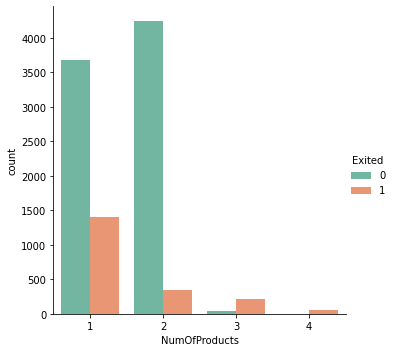

In [27]:
sns.catplot(x="NumOfProducts", kind="count", palette="Set2", data= df, hue = 'Exited')

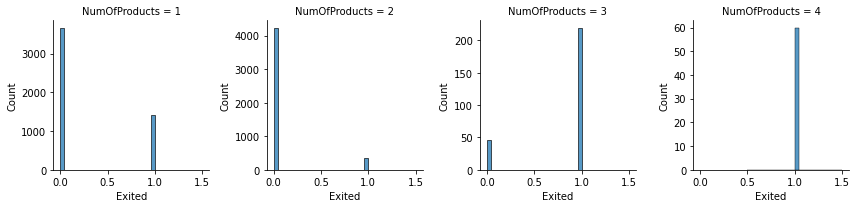

In [28]:
g = sns.FacetGrid(df, col="NumOfProducts", sharex = True, sharey = False, )
g.map_dataframe(sns.histplot, x = "Exited", bins = 24)

### H5: O Genero dos clientes influencia no comportamento de churn - VERDADEIRO

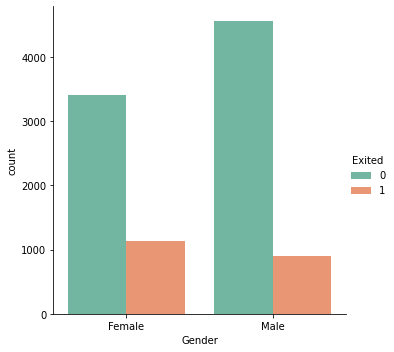

In [29]:
sns.catplot(x="Gender", kind="count", palette="Set2", data= df, hue = 'Exited')

### H6: O score financeiro do cliente influencia diretamente na probabilidade de dar churn  - FALSO
### H7: Clientes com idade mais elevada tem maior probabilidade de churn - VERDADEIRO
### H8: Clientes que possuem menos bens tem maior probabilidade de churn - FALSO
### H9: Clientes com menor valor em conta tem maior probabilidade de churn - FALSO
### H10: Clientes com menores salários tem maior probabilidade de Churn - FALSO

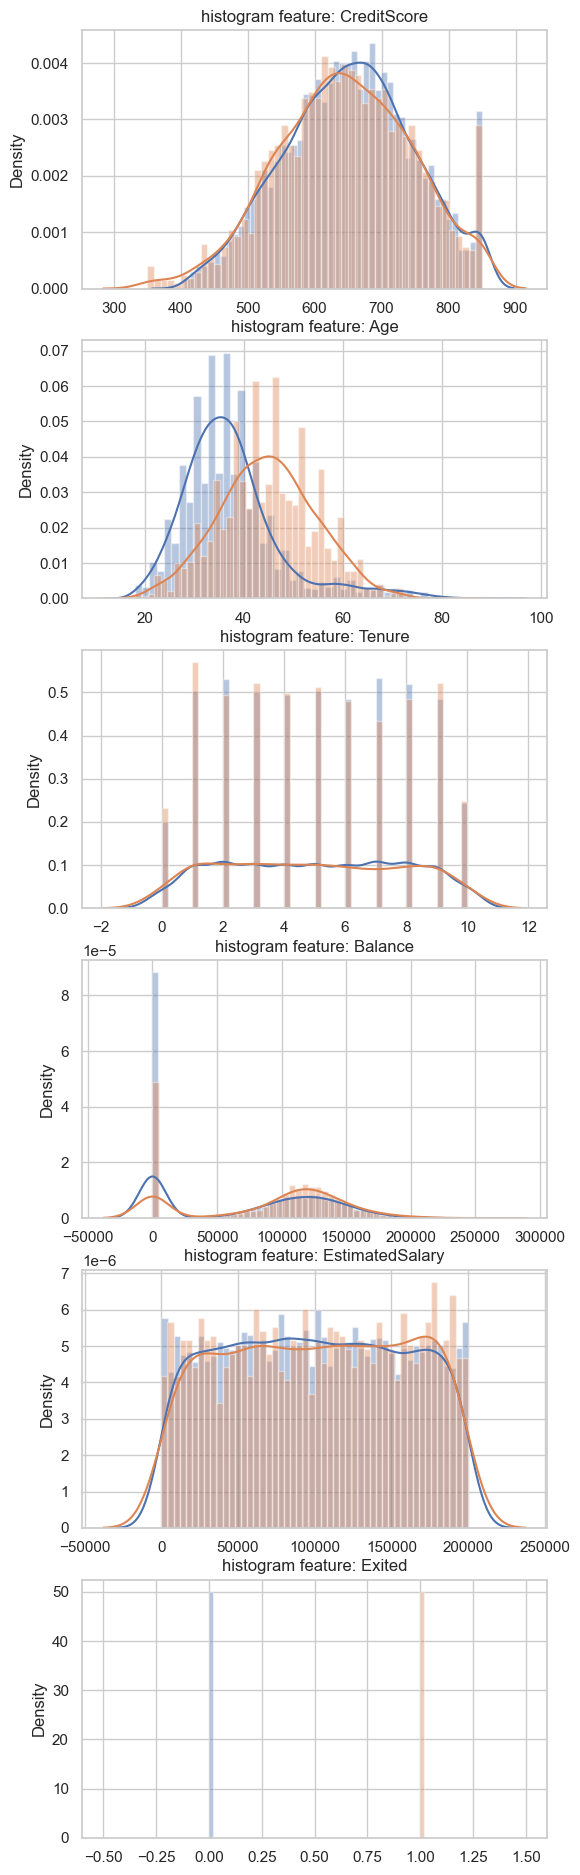

In [117]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

num_col = len(df_numerico.columns)

plt.figure(figsize=(num_col,28*4))

gs = gridspec.GridSpec(28, 1)


for i, cn in enumerate(df_numerico):
    
    ax = plt.subplot(gs[i])
    sns.distplot(df_numerico[cn][df_numerico.Exited == 0], bins=50)
    sns.distplot(df_numerico[cn][df_numerico.Exited == 1], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram feature: ' + str(cn))
    
plt.show()

## 4.5 Análise de correlação

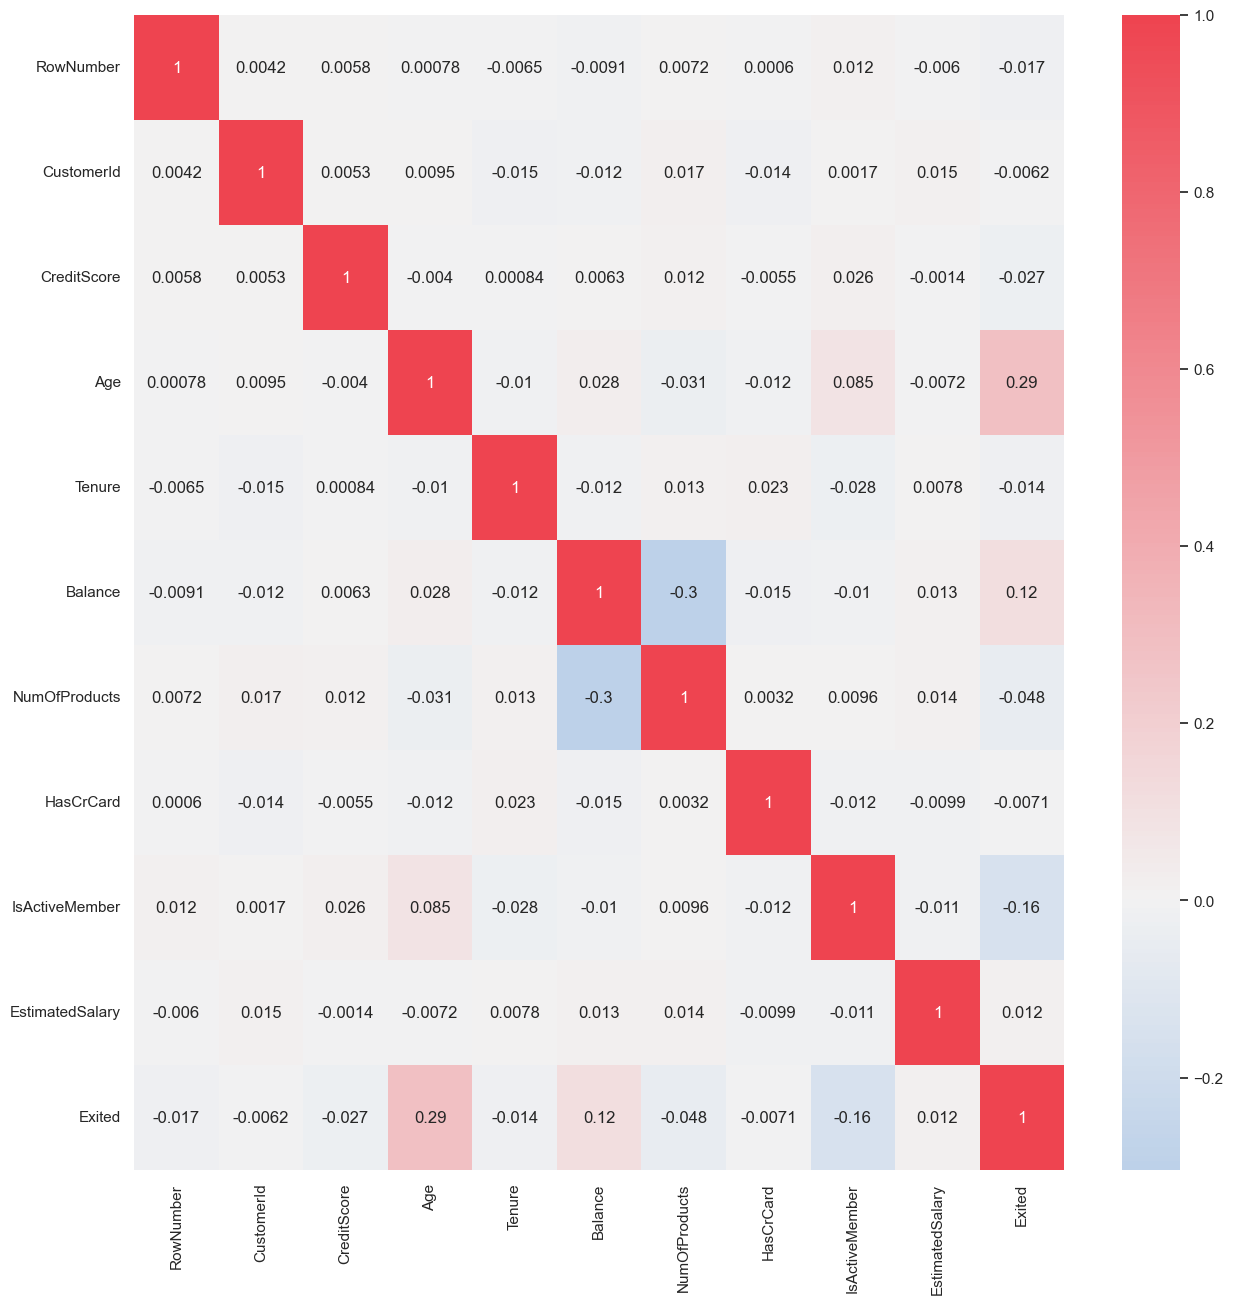

In [118]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(df.corr(),annot=True, cmap=cmap, center=0)
plt.show()

In [121]:
df.corr().sort_values(by = 'Exited', ascending = False)['Exited']

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

As com maiores correlação com Churn são: 
- Age, Balance, IsActiveMember, NumOfProducts, CreditScore

# 5 Amostragem de 20% dos dados para validação

In [14]:
X = df.drop(["Exited","RowNumber","CustomerId","Surname"],axis=1)
y = df["Exited"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2,random_state = 0, stratify = y)
y_valid.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [15]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
493,531,France,Female,47,6,0.00,1,0,0,194998.34
6839,724,Germany,Male,36,6,94615.11,2,1,1,10627.21
170,484,France,Female,29,4,130114.39,1,1,0,164017.89
4958,655,France,Male,37,6,109093.41,2,1,0,1775.52
4271,465,France,Male,33,5,0.00,2,0,1,78698.09
...,...,...,...,...,...,...,...,...,...,...
6727,745,France,Female,36,9,0.00,1,1,0,19605.18
4674,850,Germany,Male,41,1,176958.46,2,0,1,125806.30
6399,601,Germany,Male,48,9,163630.76,1,0,1,41816.49
872,722,France,Female,35,2,163943.89,2,1,1,15068.18


# 6 Pré-Processamento

## 6.1 LabelEncoding
Optaremos por realizar experimentos com 3 tipos de encoders iniciando por LabelEncoder pois das variáveis categóricas as duas que possuem categorias maior que duas são:

- Geography: Spain, Germany, France   
- NumOfProducts: 1,2,3,4    

Todas as outras categóricas já estão no formato binário ou possuem apenas 2 categorias:

- Gender: Male, Female  
- HasCrCard: 0,1  
- isActiveMeber: 0,1  
- Exited: (Target) 0,1  


In [16]:
features_encoder = ['Geography','Gender']

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X_train_labelencoder = X_train.copy()

for feature in features_encoder:
    
    X = enc.fit_transform(X_train[feature])
    
    #Atualizando o dataframe
    X_train_labelencoder[feature] = X
    
X_train_labelencoder.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
493,531,0,0,47,6,0.00,1,0,0,194998.34
6839,724,1,1,36,6,94615.11,2,1,1,10627.21
170,484,0,0,29,4,130114.39,1,1,0,164017.89
4958,655,0,1,37,6,109093.41,2,1,0,1775.52
4271,465,0,1,33,5,0.00,2,0,1,78698.09


In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X_valid_labelencoder = X_valid.copy()

for feature in features_encoder:
    
    X = enc.fit_transform(X_valid[feature])
    
    #Atualizando o dataframe
    X_valid_labelencoder[feature] = X
    
X_valid_labelencoder.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1344,460,1,0,40,6,119507.58,2,1,0,91560.63
8167,713,1,0,24,7,147687.24,1,1,1,121592.50
4747,663,2,1,64,6,0.00,2,0,1,15876.52
5004,502,1,0,57,3,101465.31,1,1,0,43568.31
3124,760,0,1,39,6,178585.46,1,1,0,67131.30


## 6.2 One Hot Encoding

In [19]:
features_encoder = ['Geography','Gender','NumOfProducts']

In [20]:
#!pip install category_encoders

In [21]:
from category_encoders.one_hot import OneHotEncoder

enc = OneHotEncoder(cols=features_encoder, use_cat_names=True)
enc.fit(X_train)

OneHotEncoder(cols=['Geography', 'Gender', 'NumOfProducts'], use_cat_names=True)

In [22]:
X_train_ohe = enc.transform(X_train)
X_train_ohe

,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,HasCrCard,IsActiveMember,EstimatedSalary
493,531,1,0,0,1,0,47,6,0.00,1,0,0,0,0,0,194998.34
6839,724,0,1,0,0,1,36,6,94615.11,0,1,0,0,1,1,10627.21
170,484,1,0,0,1,0,29,4,130114.39,1,0,0,0,1,0,164017.89
4958,655,1,0,0,0,1,37,6,109093.41,0,1,0,0,1,0,1775.52
4271,465,1,0,0,0,1,33,5,0.00,0,1,0,0,0,1,78698.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,745,1,0,0,1,0,36,9,0.00,1,0,0,0,1,0,19605.18
4674,850,0,1,0,0,1,41,1,176958.46,0,1,0,0,0,1,125806.30
6399,601,0,1,0,0,1,48,9,163630.76,1,0,0,0,0,1,41816.49
872,722,1,0,0,1,0,35,2,163943.89,0,1,0,0,1,1,15068.18


In [23]:
X_valid_ohe = enc.transform(X_valid)
X_valid_ohe

,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,HasCrCard,IsActiveMember,EstimatedSalary
1344,460,0,1,0,1,0,40,6,119507.58,0,1,0,0,1,0,91560.63
8167,713,0,1,0,1,0,24,7,147687.24,1,0,0,0,1,1,121592.50
4747,663,0,0,1,0,1,64,6,0.00,0,1,0,0,0,1,15876.52
5004,502,0,1,0,1,0,57,3,101465.31,1,0,0,0,1,0,43568.31
3124,760,1,0,0,0,1,39,6,178585.46,1,0,0,0,1,0,67131.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107,655,0,0,1,0,1,38,9,0.00,1,0,0,0,0,1,90490.33
8249,586,1,0,0,1,0,38,6,0.00,0,1,0,0,1,1,37935.83
8337,534,1,0,0,0,1,41,9,0.00,0,1,0,0,1,0,13871.34
6279,757,0,0,1,1,0,55,9,117294.12,0,0,0,1,1,0,94187.47


## 6.3 Target Encoding

In [24]:
features_encoder = ['Geography','Gender','NumOfProducts']

In [25]:
from category_encoders.target_encoder import TargetEncoder
enc = TargetEncoder(cols=features_encoder,
                   min_samples_leaf=200)
enc.fit(X_train, y_train)
X_train_targetencoding = enc.transform(X_train)
X_train_targetencoding                                     

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
493,531,0.16,0.25,47,6,0.00,0.28,0,0,194998.34
6839,724,0.32,0.16,36,6,94615.11,0.07,1,1,10627.21
170,484,0.16,0.25,29,4,130114.39,0.28,1,0,164017.89
4958,655,0.16,0.16,37,6,109093.41,0.07,1,0,1775.52
4271,465,0.16,0.16,33,5,0.00,0.07,0,1,78698.09
...,...,...,...,...,...,...,...,...,...,...
6727,745,0.16,0.25,36,9,0.00,0.28,1,0,19605.18
4674,850,0.32,0.16,41,1,176958.46,0.07,0,1,125806.30
6399,601,0.32,0.16,48,9,163630.76,0.28,0,1,41816.49
872,722,0.16,0.25,35,2,163943.89,0.07,1,1,15068.18


In [26]:
X_valid_targetencoding = enc.transform(X_valid)
X_valid_targetencoding                                      

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1344,460,0.32,0.25,40,6,119507.58,0.07,1,0,91560.63
8167,713,0.32,0.25,24,7,147687.24,0.28,1,1,121592.50
4747,663,0.17,0.16,64,6,0.00,0.07,0,1,15876.52
5004,502,0.32,0.25,57,3,101465.31,0.28,1,0,43568.31
3124,760,0.16,0.16,39,6,178585.46,0.28,1,0,67131.30
...,...,...,...,...,...,...,...,...,...,...
9107,655,0.17,0.16,38,9,0.00,0.28,0,1,90490.33
8249,586,0.16,0.25,38,6,0.00,0.07,1,1,37935.83
8337,534,0.16,0.16,41,9,0.00,0.07,1,0,13871.34
6279,757,0.17,0.25,55,9,117294.12,0.20,1,0,94187.47


# 7 Prototipação - Balanceamento de classes e seleção de modelos

In [27]:
Exemplos_minoritario = y_train.value_counts()[1]/(y_train.value_counts().sum())*100
Exemplos_majoritario = y_train.value_counts()[0]/(y_train.value_counts().sum())*100

fator_balanceamento_inicial = Exemplos_minoritario / (100 - Exemplos_minoritario)
fator_balanceamento_inicial

0.25588697017268447

In [28]:
fator_balanceamento_inicial= 0.26

#### Definindo dicionário com os dados de diferentes tipos de encoding

In [29]:
dicionario_teste = {'labelencode': [X_train_labelencoder, X_valid_labelencoder], 'ohe': [X_train_ohe, X_valid_ohe], 'target': [X_train_targetencoding, X_valid_targetencoding] }

In [98]:
from sklearn.preprocessing import StandardScaler
    
df_models = pd.DataFrame()

fator_balanceamento = np.linspace(fator_balanceamento_inicial,0.99,20).tolist()
#fator_balanceamento = np.linspace(0.38,0.65,20).tolist()

#Loop numero de repetições do experimento
for i in range(2):
    
    #loop fator de Balanceamento
    for fator in fator_balanceamento:
        
        #Acompanhamento do andamento dos experimentos
        print(i+1,fator)
        
        #loop tipo de encoding
        for encode in dicionario_teste.keys():
            
            
            #Definindo os dados de acordo com o encoding
            X_train2 = dicionario_teste[encode][0]
            y_train2 = y_train
            
            X_valid2 = dicionario_teste[encode][1]


            ###################################################### UNDERSAMPLING ###############################################
            
            #Aplicando balanceamento    
            nr = NearMiss(sampling_strategy = fator)
            X_train3, y_train3 = nr.fit_resample(X_train2, y_train2)

            #Definindo dados de treino (aprendendo com 80% da amostra de treino)
            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3,test_size=0.2,random_state = i, stratify = y_train3)

            # Normalizando
            scaler = StandardScaler()
            scaler.fit(X_train4)

            X_train_norm = scaler.transform(X_train4)
            X_valid_norm = scaler.transform(X_valid2)
            
            #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UnderSampling'
            models['encode'] = encode
            models['Normalizacao'] = "NAO"
            df_models = df_models.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UnderSampling'
            models['encode'] = encode
            models['Normalizacao'] = "SIM"
            df_models = df_models.append(models.reset_index(), ignore_index=True)


            ###################################################### UPSAMPLING ###############################################

          
            #Aplicando balanceamento    
            smt = SMOTE(sampling_strategy = fator)
            X_train3, y_train3 = smt.fit_resample(X_train2, y_train2)

            #Definindo dados de treino (aprendendo com 80% da amostra de treino)
            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3,test_size=0.2,random_state = i, stratify = y_train3)

            # Normalizando
            scaler = StandardScaler()
            scaler.fit(X_train4)

            X_train_norm = scaler.transform(X_train4)
            X_valid_norm = scaler.transform(X_valid2)
            
            
            #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UpSampling'
            models['encode'] = encode
            models['Normalizacao'] = "NAO"
            df_models = df_models.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid)
            models['fator'] = fator
            models['metodo'] = 'UpSampling'
            models['encode'] = encode
            models['Normalizacao'] = "SIM"
            df_models = df_models.append(models.reset_index(), ignore_index=True)

1 0.26


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  2.91it/s]


1 0.298421052631579


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:10<00:00,  2.75it/s]


1 0.3368421052631579


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:16<00:00,  1.71it/s]


1 0.37526315789473685


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:17<00:00,  1.62it/s]


1 0.41368421052631577


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:18<00:00,  1.54it/s]


1 0.45210526315789473


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:20<00:00,  1.45it/s]


1 0.4905263157894737


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:16<00:00,  1.78it/s]


1 0.5289473684210526


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.35it/s]


1 0.5673684210526315


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:17<00:00,  1.65it/s]


1 0.6057894736842105


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:17<00:00,  1.64it/s]


1 0.6442105263157895


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:17<00:00,  1.68it/s]


1 0.6826315789473685


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.33it/s]


1 0.7210526315789474


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:18<00:00,  1.54it/s]


1 0.7594736842105263


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:19<00:00,  1.49it/s]


1 0.7978947368421052


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.33it/s]


1 0.8363157894736842


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.38it/s]


1 0.8747368421052631


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.34it/s]


1 0.9131578947368421


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:22<00:00,  1.30it/s]


1 0.9515789473684211


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:23<00:00,  1.25it/s]


1 0.99


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:23<00:00,  1.21it/s]


2 0.26


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  2.91it/s]


2 0.298421052631579


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:10<00:00,  2.68it/s]


2 0.3368421052631579


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:12<00:00,  2.37it/s]


2 0.37526315789473685


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:12<00:00,  2.27it/s]


2 0.41368421052631577


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:13<00:00,  2.15it/s]


2 0.45210526315789473


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:14<00:00,  2.03it/s]


2 0.4905263157894737


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:15<00:00,  1.89it/s]


2 0.5289473684210526


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:15<00:00,  1.90it/s]


2 0.5673684210526315


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:15<00:00,  1.82it/s]


2 0.6057894736842105


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:16<00:00,  1.79it/s]


2 0.6442105263157895


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:17<00:00,  1.66it/s]


2 0.6826315789473685


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:24<00:00,  1.20it/s]


2 0.7210526315789474


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:31<00:00,  1.08s/it]


2 0.7594736842105263


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:32<00:00,  1.12s/it]


2 0.7978947368421052


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:34<00:00,  1.19s/it]


2 0.8363157894736842


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.34it/s]


2 0.8747368421052631


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:23<00:00,  1.24it/s]


2 0.9131578947368421


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:24<00:00,  1.17it/s]


2 0.9515789473684211


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:25<00:00,  1.12it/s]


2 0.99


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:26<00:00,  1.11it/s]


In [99]:
pd.set_option('display.precision',5)

In [100]:
pd.reset_option('^display.',silent=True)

In [101]:
df_models.groupby(['Model','fator','metodo','encode','Normalizacao']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False).head(50)

Accuracy  \
Model                  fator    metodo        encode      Normalizacao             
LGBMClassifier         0.990000 UpSampling    labelencode NAO            0.81850   
                                                          SIM            0.81850   
                       0.836316 UpSampling    labelencode SIM            0.82600   
                                                          NAO            0.82600   
                       0.951579 UpSampling    labelencode SIM            0.81775   
                                                          NAO            0.81775   
                       0.913158 UpSampling    labelencode SIM            0.82250   
                                                          NAO            0.82250   
                       0.874737 UpSampling    labelencode SIM            0.82125   
                                                          NAO            0.82125   
                       0.797895 UpSampling    labelencode SIM            0.82725   
                                                          NAO            0.82725   
                       0.759474 UpSampling    labelencode SIM            0.83075   
                                                          NAO            0.83075   
                       0.644211 UpSampling    labelencode SIM            0.83825   
                                                          NAO            0.83825   
                       0.682632 UpSampling    labelencode NAO            0.83225   
                                                          SIM            0.83225   
                       0.721053 UpSampling    labelencode NAO            0.83325   
                                                          SIM            0.83325   
                       0.605789 UpSampling    labelencode SIM            0.83725   
                                                          NAO            0.83725   
                       0.567368 UpSampling    labelencode SIM            0.83825   
                                                          NAO            0.83825   
                       0.490526 UpSampling    labelencode SIM            0.84350   
                                                          NAO            0.84350   
SVC                    0.490526 UnderSampling ohe         NAO            0.78400   
                                                          SIM            0.78400   
LGBMClassifier         0.528947 UpSampling    labelencode SIM            0.84075   
                                                          NAO            0.84075   
RandomForestClassifier 0.836316 UpSampling    labelencode NAO            0.82150   
                                                          SIM            0.82150   
XGBClassifier          0.797895 UpSampling    labelencode NAO            0.81775   
                                                          SIM            0.81775   
                       0.913158 UpSampling    labelencode NAO            0.81650   
                                                          SIM            0.81650   
                       0.836316 UpSampling    labelencode SIM            0.81675   
                                                          NAO            0.81675   
AdaBoostClassifier     0.797895 UpSampling    labelencode NAO            0.80275   
                                                          SIM            0.80275   
SVC                    0.528947 UnderSampling ohe         SIM            0.74900   
                                                          NAO            0.74900   
LGBMClassifier         0.874737 UpSampling    ohe         SIM            0.85900   
                                                          NAO            0.85900   
XGBClassifier          0.990000 UpSampling    labelencode NAO            0.81300   
                                                          SIM            0.81300   
AdaBoostClassifier     0.990000 UpSampli

Os modelos candidatos sem tunar atingiram acurácia de 78 á 82% sobre os dados de validação utilizando todas as features:

- Modelos candidatos: LGBMClassifier  
- Fator de Balanceamento: 0.99  
- Método de Balanceamento: UpSampling  
- Tipo de Encoding: labelencoder  
- Normalização: NAO  
  
  
- Modelos candidatos: SVC  
- Fator de Balanceamento: 0.490526  
- Método de Balanceamento: UnderSampling  
- Tipo de Encoding: onehotencoder  
- Normalização: NAO  
  
  
- Modelos candidatos: RandomForestClassifier  
- Fator de Balanceamento: 0.836316  
- Método de Balanceamento: UpSampling  
- Tipo de Encoding: labelencoder  
- Normalização: NAO  



# 8 Tuning do Modelo e Seleção de Features

## Random Forest e LGBM

O codigo abaixo é responsável por selecionar:
    - Fator de balanceamento nos dados de treino
    - Melhor tipo de encoding entre: LabelEncoder, OneHotEncoder, TargetEncoder
    - Melhor Quantidade de features
    - Melhor conjunto de features
    - Pipelines com normalização
    - Pipelines sem normalização
    - Pipelines com seleção aleatória de features e com SelectFromModel do scikit-learn
    - Melhor conjunto de hiperparâmetros
    
Validando o resultados sobre os dados de validação separados inicialmente no tópico 5 (20% da amostra) conforme o pipeline desenhado no inicio do notebook

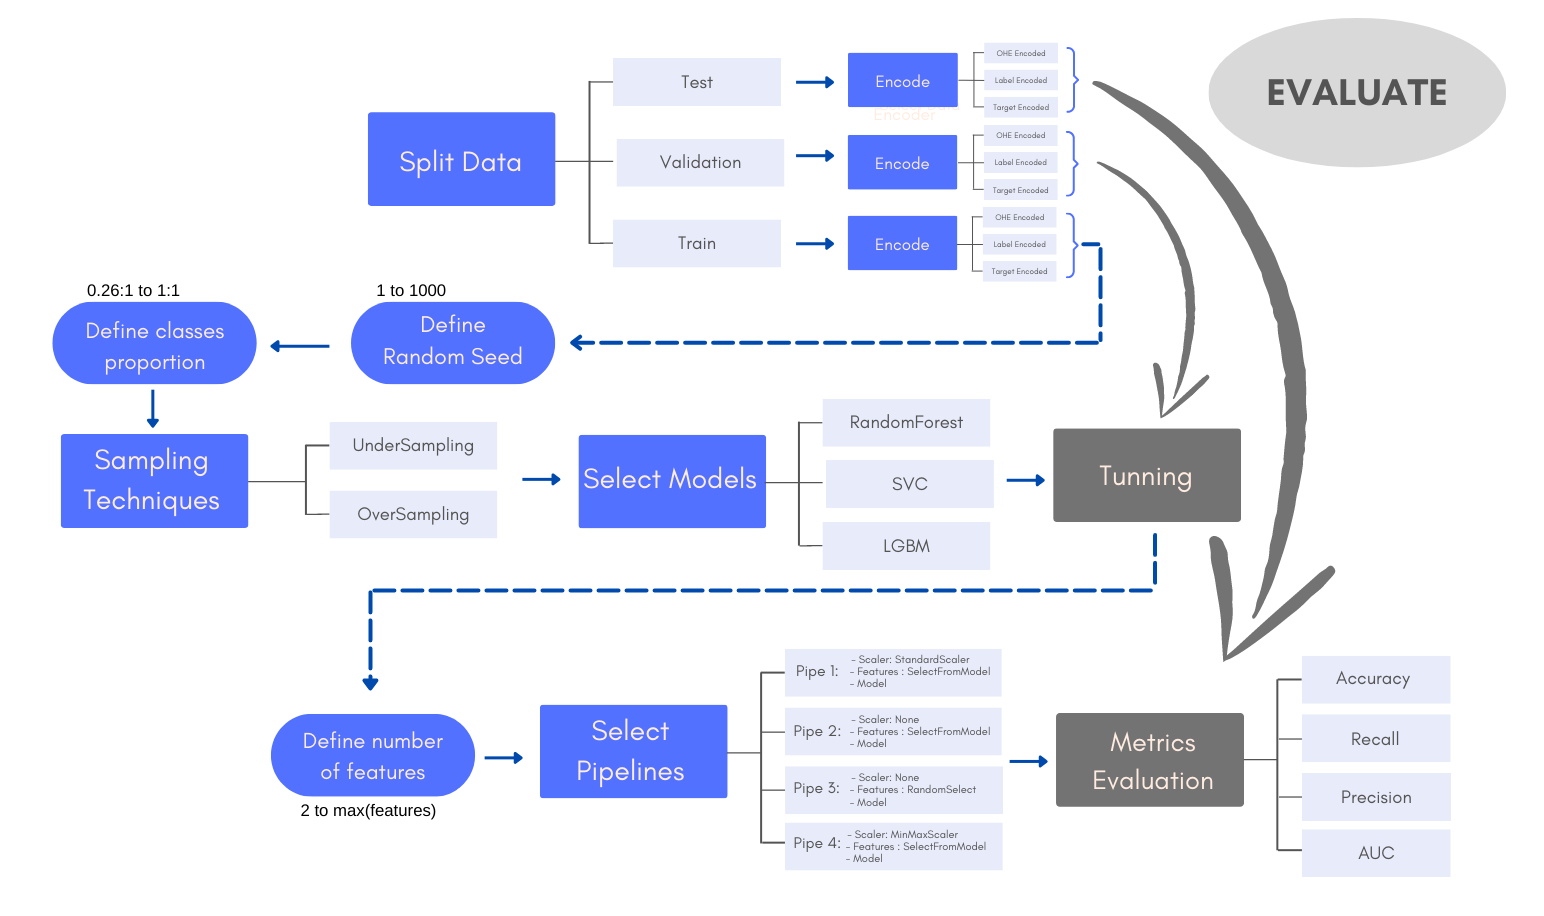

In [3]:
from IPython.display import Image
Image("Pipeline.png")

In [350]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

#Classweights testadas no algoritmo
#weights = np.linspace(0.2,0.5,10) 
#weights = np.linspace(0.1,0.9,11)
weights = np.linspace(0.1,0.9,5)

list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score }

#estrategias de amostragem
#estrategias_amostragem = ['SMOTE','Undersampling']
estrategias_amostragem = ['SMOTE']

#Estrategias de encoding
dicionario_teste = { 'onehotencoder': [X_train_ohe, X_valid_ohe], 'labelencoder': [X_train_labelencoder, X_valid_labelencoder], 'targetencoder': [X_train_targetencoding, X_valid_targetencoding] }


#Fator de balanceamento aplicado ás estrategias de amostragem
fator_balanceamento = [0.3333, 0.490526, 0.6666, 0.836316, 1]
#fator_balanceamento = [0.26, 0.3333]
#fator_balanceamento = [0.26]
#fator_balanceamento = [0.6, 0.75, 0.9, 1]
#fator_balanceamento = [1]

maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0

#Reset na lista de resultados dos modelos iterados
resultados_model1 = []
resultados_model2 = []


#Loop de seed aleatória
#for seed in range(1):
for seed in range(1000):

    print("Iterando seed = {}".format(seed))     
   
       
    #loop tipo de encoding
    for encode in dicionario_teste.keys():
            
            
        ################ Definição do tipo de encoding dos dados: ################
        X_train2 = dicionario_teste[encode][0]
        y_train2 = y_train

        X_valid2 = dicionario_teste[encode][1]
            
            
        #Loop Seletor de features:
        for k in range(X_train2.shape[1]-2, X_train2.shape[1], 1):   #Iterar sobre n total de features e n-2.
            
            
            #Selecionando features aleatoriamente aplicado ao  PIPE3
            selected = np.random.choice(X_train2.columns, k, replace=False)
            
            
            #Loop fator de balanceamento
            for fator in fator_balanceamento:
                       
                #Loop estrategia de amostragem
                for estrategia in estrategias_amostragem:
                    
                    if estrategia == "SMOTE":
                        
                        ## Balanceamento com upsampling 
                        smt = SMOTE(sampling_strategy = fator, random_state=seed )
                        X_train3, y_train3 = smt.fit_resample(X_train2, y_train2)
                    
                    else: #Estrategia = undersampling
                        nr = NearMiss(sampling_strategy = fator)
                        X_train3, y_train3 = nr.fit_resample(X_train2, y_train2)
                        

                    ################ Definição de modelos candidatos ################
                    model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
                    model2 = LGBMClassifier(random_state=seed, n_jobs=-1)

                    models = [model1,model2]
                    nome_modelo = ['RandomForest', 'LGBM']

                    #models = [model2]
                    #nome_modelo = ['LGBM']

                    ################ Definindo conjunto de treino + validacao para avaliar gridsearch nos dados de avaliação ################
                    ## Concatenando dados de treino e valid:
                    X_train_valid = pd.concat([X_train3, X_valid2], ignore_index = True )
                    y_train_valid = pd.concat([y_train3, y_valid], ignore_index = True )


                    # The indices which have the value -1 will be kept in train.
                    train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

                    # The indices which have zero or positive values, will be kept in valid
                    valid_indices = np.full((X_valid2.shape[0],), 0, dtype=int)
                    valid_fold = np.append(train_indices, valid_indices)

                    # definindo o conjunto de validação
                    ps = PredefinedSplit(valid_fold)


                    ############# Paramgrid de modelos ################

                    ##Grid model 1 RandomForest
                    #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy']}
                    #param_grid1={"max_depth":[None], "min_samples_split":[2,3,5,8,12], "min_samples_leaf":[1], "criterion":['gini']}
                    #param_grid1={"max_depth":[None], "min_samples_split":[3], "min_samples_leaf":[1], "criterion":['gini']}
                    #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini']}
                    #param_grid1={"max_depth":[None,10,20,40], "min_samples_split":[2,3,5,10,20], "min_samples_leaf":[1,3,5,10], "criterion":['gini','entropy']}
                    param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini'], 'class_weight': list_class_weights}
                    
                    ##Grid model 2 LGBM
                    #param_grid2={"max_depth":[-1,10,20], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50]}
                    #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[250,300,400], "num_leaves":[2,5,8,12,16,20]}
                    #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1,0.01], "n_estimators":[70,100,150,200], "num_leaves":[31,10,25,50,80,120]}
                    #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'] }
                    #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1], "n_estimators":[150,200], "num_leaves":[31,10,25], 'class_weight': list_class_weights}
                    param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'class_weight': list_class_weights }

                    list_param_grids = [param_grid1, param_grid2]
                    
                    #list_param_grids = [param_grid2]
                    dictionary_paramgrid = dict(zip(models, list_param_grids))


                    #Loop modelos
                    for num_modelo, model in enumerate(models):

                        nome_modelo_testado = nome_modelo[num_modelo]

                        param_grid = dictionary_paramgrid[model]

                        ############# GridSearch de modelos candidatos com todas features ################
                        gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f1", n_jobs=-1, cv = ps )

                        #Fit dados 
                        gs.fit(X_train_valid,y_train_valid)

                        #melhores hyperparametros:
                        hyperparametros = list(gs.best_params_.values())
                        nome_hyperparametros = list(gs.best_params_.keys())


                        #melhor modelo
                        # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
                        # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
                        # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
                        modelo_tunado = gs.best_estimator_

                        # Refit no modelo tunado com apenas dados de treino para evitar overtting ao avaliar sobre dados de valid
                        modelo_tunado.fit(X_train3,y_train3)


                        ################ Definição de Pipelines com modelo tunado ################
                        pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                        pipe2 = Pipeline([('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                        pipe3 = Pipeline([(nome_modelo_testado, modelo_tunado)])
                        pipe4 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])

                        pipelines = [pipe1,pipe2,pipe3,pipe4]


                        #Loop das pipelines testadas com seletor de features e outras etapas:
                        for num_pipe, pipe in enumerate(pipelines):
                    

                            ################# Aplicando seleção aleatoria de features ao PIPE3 e nomeando as features ################
                            if num_pipe == 2:
                                X_train4 = X_train3[selected]
                                y_train4 = y_train3
                                X_valid3 = X_valid2[selected]
                            else:
                                X_train4 = X_train3
                                y_train4 = y_train3
                                X_valid3 = X_valid2


                            #Fit Pipe
                            pipe.fit(X_train4,y_train4)

                            #Acurácia da pipe
                            #accuracy_valid = pipe.score(X_valid3, y_valid)     

                           # Nome das features selecionadas para PIPE1 , PIPE2 e PIPE3
                            if num_pipe == 2:

                                features_selecionadas = ','.join(list(selected))

                            else:

                                selector = SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)
                                selector.fit(X_train4,y_train4)
                                mask = selector.get_support()
                                features_selecionadas = ','.join(list(X_train4.columns[mask]))


                            #Armazenando propriedades das PIPES
                            if num_pipe == 0:
                                seletor_feature = "SelectFromModel"
                                scaler = "StandardScaler"

                            if num_pipe == 1:
                                seletor_feature = "SelectFromModel"
                                scaler = "Sem Scaler"

                            if num_pipe == 2:
                                seletor_feature = 'Aleatorio'
                                scaler = "StandardScaler"

                            if num_pipe == 3:
                                seletor_feature = 'Aleatorio'
                                seletor_feature = "SelectFromModel"
                                scaler = "MinMaxScaler"

                            ################ Calculando métricas da pipe ################
                            # Fazendo predição
                            p = pipe.predict(X_valid3)

                            #Calculando o recall
                            recall_0 = recall_score(y_valid, p, pos_label=0)
                            recall_1 = recall_score(y_valid, p, pos_label=1)

                            #Calculando Precision
                            precision_0 = precision_score(y_valid, p, pos_label = 0)
                            precision_1 = precision_score(y_valid, p, pos_label = 1)

                            #Calculando acurácia
                            accuracy = accuracy_score(y_valid, p)

                            #Calculando AUC
                            auc = roc_auc_score(y_valid, p)



                            ################# Armazenando e imprimindo os resultados  ################
                                
                            col_names = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia_valid', 'recall_0','recall_1','prec_0','prec_1','auc']
                            dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))
                            
                            if num_modelo ==0:
                                
                                col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia_valid', 'recall_0','recall_1','prec_0','prec_1','auc']
                                resultados_model1.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))
                                 
                                ## Imprime resultados do melhor modelo 1                                
                                if auc > maximo_auc_model1:
                                
                                    print("============================================================================================================================")
                                    print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {}".format(nome_modelo_testado, auc, seed))
                                    print("     Características dados de treino: estratégia_amostragem = {} - proporção_classes = {} - tipo_encoding = {}".format(estrategia, fator, encode))
                                    print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                    print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                    print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                    print("     Features Selecionadas = {}".format(features_selecionadas))
                                    print("")
                                    print("============================================================================================================================")
                                    
                                    col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia_valid', 'recall_0','recall_1','prec_0','prec_1','auc']
                                    melhor_modelo1 = pipe
                                    maximo_auc_model1 = auc
                            
                            if num_modelo ==1:
                                
                                col_names_modelo2 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia_valid', 'recall_0','recall_1','prec_0','prec_1','auc']
                                resultados_model2.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                                ## Imprime resultados do melhor modelo 2
                                if auc > maximo_auc_model2:

                                    print("============================================================================================================================")
                                    print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {}".format(nome_modelo_testado, auc, seed))
                                    print("     Características dados de treino: estratégia_amostragem = {} - proporção_classes = {} - tipo_encoding = {}".format(estrategia, fator, encode))
                                    print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                    print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                    print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                    print("     Features Selecionadas = {}".format(features_selecionadas))
                                    print("")
                                    print("============================================================================================================================")
                                    
                                    
                                    melhor_modelo2 = pipe
                                    maximo_auc_model2 = auc
                            


                            # Imprime resultados do melhor modelo global até o momento.                         
                            if auc > maximo_auc:
                                #print("Novo melhor modelo encontrado:  modelo = {} - AUC = {} - fator_balanceamento_classes = {} - num_pipeline = {}, tipo_encoding = {} - tipo_scaler = {} - num_seed_aleatoria = {} - num_features = {} - metodo_selecao_features = {} - features_selecionadas = {} - hyperparâmetros_selecionados = {}".format("RF", fator, auc,num_pipe+1, encode, scaler, seed, k, seletor_feature, features_selecionadas, dictionary_hyperparams))

                                print("============================================================================================================================")
                                print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {}".format(nome_modelo_testado, auc, seed))
                                print("     Características dados de treino: estratégia_amostragem = {} - proporção_classes = {} - tipo_encoding = {}".format(estrategia, fator, encode))
                                print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                print("     Features Selecionadas = {}".format(features_selecionadas))
                                print("")
                                print("============================================================================================================================")

                                melhor_modelo = pipe
                                maximo_auc = auc

                            #break

Iterando seed = 0
NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.748181154960816 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.3333 - tipo_encoding = onehotencoder
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.30000000000000004, 1: 0.7}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
     Características das features selecionadas: num_features = 14 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,IsActiveMember,EstimatedSalary

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC = 0.748181154960816 - num_seed_aleatoria = 0
     Características dados de treino

NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.7596934376595393 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.6666 - tipo_encoding = onehotencoder
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.30000000000000004, 1: 0.7}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 14 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts_1.0,NumOfProducts_2.0,HasCrCard,IsActiveMember,EstimatedSalary

NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.7600073108547685 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - propor

NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.7722822977060266 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 1 - tipo_encoding = onehotencoder
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.30000000000000004, 1: 0.7}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 14 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts_1.0,NumOfProducts_2.0,HasCrCard,IsActiveMember,EstimatedSalary

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC = 0.7722822977060266 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMO

NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.7729910187537307 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 0.836316 - tipo_encoding = targetencoder
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.30000000000000004, 1: 0.7}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 8 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary

NOVO MÍNIMO LOCAL ENCONTRADO:  LGBM - AUC = 0.7823262399533586 - num_seed_aleatoria = 0
     Características dados de treino: estratégia_amostragem = SMOTE - proporção_classes = 1 - tipo_encoding = targetencoder
     Características pipeline: num_pipeline = 1 - tipo_sca

KeyboardInterrupt: 

## Melhores resultados RandomForest

In [370]:
####### Resultados Modelo 1: RF

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[11:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:11]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types


## Agrupando por hiperparâmetros e ordenando pelas métricas
resultados_df_model1.astype(dict_data_types).groupby(col_params).agg({'acuracia_valid':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, }).sort_values(by='auc', ascending=False).head(50)

acuracia_valid  \
class_weight                     criterion max_depth min_samples_leaf min_samples_split modelo       features                                           num_pipe fator_balanceamento seed tipo_encode                     
{0: 0.30000000000000004, 1: 0.7} gini      10        1                5                 RandomForest CreditScore,Geography,Gender,Age,Balance,NumOfP... 4        0.6666              1    targetencoder          0.8280   
                                                                      2                 RandomForest CreditScore,Geography,Gender,Age,Balance,NumOfP... 1        0.836316            0    targetencoder          0.8205   
                                                                      5                 RandomForest CreditScore,Geography,Gender,Age,Balance,NumOfP... 1        0.6666              1    targetencoder          0.8275   
                                                                                                                                                        2        0.6666              1    targetencoder          0.8275   
                                                     3                2                 RandomForest CreditScore,Geography,Gender,Age,Balance,NumOfP... 4        0.6666              2    labelencoder           0.7865   
                                                                                                                                                        2        0.6666              2    labelencoder           0.7865   
                                                                                                                                                        1        0.6666              2    labelencoder           0.7865   
                                                     1                2                 RandomForest CreditScore,Geography,Gender,Age,Balance,NumOfP... 2        0.836316            0    targetencoder          0.8200   
                                                     3                2                 RandomForest NumOfProducts_4.0,HasCrCard,Balance,Gender_Fema... 3        1                   0    onehotencoder          0.7995   
                                                                                                     CreditScore,Geography_France,Geography_Germany,... 2        1                   0    onehotencoder          0.8155   
                                                                                                                                                        1        1                   0    onehotencoder          0.8150   
                                                     1                5                 RandomForest CreditScore,Geography,Gender,Age,Tenure,Balance... 1        0.6666              1    targetencoder          0.8330   
                                                                                                                                                        2        0.6666              1    targetencoder          0.8325   
                                                     3                2                 RandomForest CreditScore,Geography_France,Geography_Germany,... 4        1                   0    onehotencoder          0.8145   
                                                     1                2                 RandomForest CreditScore,Geography,Gender,Age,Balance,NumOfP... 4        0.836316            0    targetencoder          0.8185   
                                                                      5                 RandomForest CreditScore,Geography,Gender,Age,Tenure,Balance... 4        0.6666              1    targetencoder          0.8325   
                                                                      2                 RandomForest CreditScore,Geography_France,Geography_Germany,... 1        0.836316            2    onehotencoder          0.8220   
                                        

## Melhores resultados LGBM

In [371]:
####### Resultados Modelo 2: LGBM

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model2 = pd.DataFrame(np.array(resultados_model2), columns=col_names_modelo2)
resultados_df_model2['auc'] = resultados_df_model2['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo2[11:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo2[:11]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types


## Agrupando por hiperparâmetros e ordenando pelas métricas
resultados_df_model2.astype(dict_data_types).groupby(col_params).agg({'acuracia_valid':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, }).sort_values(by='auc', ascending=False).head(50)


acuracia_valid  \
class_weight                     learning_rate max_depth n_estimators num_leaves modelo features                                           num_pipe fator_balanceamento seed tipo_encode                     
{0: 0.30000000000000004, 1: 0.7} 0.1           -1        200          10         LGBM   CreditScore,Geography,Gender,Age,Tenure,Balance... 1        1                   0    targetencoder          0.8310   
                                                                                                                                           2        1                   0    targetencoder          0.8315   
                                                                                                                                           4        1                   0    targetencoder          0.8295   
                                                                                        CreditScore,Geography_France,Geography_Germany,... 2        0.836316            2    onehotencoder          0.8320   
                                                                                        CreditScore,Geography_France,Geography_Germany,... 4        0.490526            2    onehotencoder          0.8385   
                                                                                        CreditScore,Geography_France,Geography_Germany,... 2        1                   0    onehotencoder          0.8295   
                                                                                        CreditScore,Geography_France,Geography_Germany,... 1        1                   0    onehotencoder          0.8335   
                                                                                        CreditScore,Geography_France,Geography_Germany,... 4        0.836316            2    onehotencoder          0.8305   
                                                                                        NumOfProducts_4.0,HasCrCard,Balance,Gender_Fema... 3        1                   0    onehotencoder          0.8150   
                                                                                        CreditScore,Geography_France,Geography_Germany,... 1        0.836316            0    onehotencoder          0.8350   
                                                                                                                                           4        1                   2    onehotencoder          0.8285   
                                                                                        CreditScore,Geography_France,Geography_Germany,... 2        0.836316            2    onehotencoder          0.8295   
                                                                                        NumOfProducts_4.0,HasCrCard,Balance,Gender_Fema... 3        0.6666              0    onehotencoder          0.8270   
                                                                                        Geography_France,Age,Geography_Spain,Geography_... 3        1                   1    onehotencoder          0.8175   
                                                                                        CreditScore,Geography_France,Geography_Germany,... 2        0.490526            2    onehotencoder          0.8360   
                                                                                        NumOfProducts_4.0,HasCrCard,Balance,Gender_Fema... 3        0.490526            0    onehotencoder          0.8325   
                                                                                        CreditScore,Geography,Gender,Age,Tenure,Balance... 1        0.6666              1    targetencoder          0.8325   
                                                                                        CreditScore,Geography,Age,Tenure,Balance,NumOfP... 1        0.3333              0    labelencoder           0.8295   
                                                                    

## 9.0 Persistencia do modelo em disco:

In [381]:
#Caracteristicas melhor modelo 1:
print(resultados_df_model1.sort_values(by='auc', ascending=False).iloc[0])
features_modelo1 = resultados_df_model1.sort_values(by='auc', ascending=False).iloc[0]['features']

class_weight                            {0: 0.30000000000000004, 1: 0.7}
criterion                                                           gini
max_depth                                                             10
min_samples_leaf                                                       1
min_samples_split                                                      5
modelo                                                      RandomForest
features               CreditScore,Geography,Gender,Age,Balance,NumOf...
num_pipe                                                               4
fator_balanceamento                                               0.6666
seed                                                                   1
tipo_encode                                                targetencoder
acuracia_valid                                                     0.828
recall_0                                                        0.865662
recall_1                                           

In [384]:
import joblib
joblib.dump(melhor_modelo1, 'modelo-RF.pkl',compress=4)

['modelo-RF.pkl']

In [385]:
#Caracteristicas melhor modelo 2:
print(resultados_df_model2.sort_values(by='auc', ascending=False).iloc[0])
features_modelo2 = resultados_df_model2.sort_values(by='auc', ascending=False).iloc[0]['features']

class_weight                            {0: 0.30000000000000004, 1: 0.7}
learning_rate                                                        0.1
max_depth                                                             -1
n_estimators                                                         200
num_leaves                                                            10
modelo                                                              LGBM
features               CreditScore,Geography,Gender,Age,Tenure,Balanc...
num_pipe                                                               1
fator_balanceamento                                                    1
seed                                                                   0
tipo_encode                                                targetencoder
acuracia_valid                                                     0.831
recall_0                                                        0.864407
recall_1                                           

In [397]:
import joblib
joblib.dump(melhor_modelo2, 'modelo-lgbm.pkl',compress=4)

['modelo-lgbm.pkl']

In [387]:
#import joblib
#joblib.dump(melhor_modelo3, 'modelo-svc.pkl',compress=4)

## 10.0 Carregando o modelo em disco e reavaliando as métricas

In [399]:
import joblib
import os
model = joblib.load(open(os.path.join('modelo-lgbm.pkl'),"rb"))
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('seletor',
                 SelectFromModel(estimator=LGBMClassifier(class_weight={0: 0.30000000000000004,
                                                                        1: 0.7},
                                                          n_estimators=200,
                                                          num_leaves=10,
                                                          random_state=0),
                                 max_features=9, threshold=-inf)),
                ('LGBM',
                 LGBMClassifier(class_weight={0: 0.30000000000000004, 1: 0.7},
                                n_estimators=200, num_leaves=10,
                                random_state=0))])

In [402]:
############ INPUT:
encoder_utilizado = 'targetencoder'
seed = 0
num_pipe = 1
fator_balanceamento = 1 

#### INPUT SE num_pipe = 3 --- COMENTAR SE o numero da pipe não for = 3
#if num_pipe == 3:
    #seletor_aleatorio = ['Balance','Geography_Spain','Geography_Germany','NumOfProducts_1.0','Age','NumOfProducts_4.0','Tenure','CreditScore','Geography_France','NumOfProducts_2.0','Gender_Female','EstimatedSalary','IsActiveMember','NumOfProducts_3.0']


## Dados treino
X_train2 = dicionario_teste[encoder_utilizado][0]
y_train2 = y_train

## Dados teste
X_valid2 = dicionario_teste[encoder_utilizado][1]         
X_valid3 = X_valid2

# Balanceamento c/ seed do melhor modelo
smt = SMOTE(sampling_strategy = fator_balanceamento, random_state=seed )
X_train3, y_train3 = smt.fit_resample(X_train2, y_train2)

#Seletor aleatório de feature
if num_pipe == 3:
    X_train3 = X_train3[seletor_aleatorio]
    X_valid3 = X_valid3[seletor_aleatorio]

    
#fit treino
model.fit(X_train3,y_train3)

#predict validacao
p = model.predict(X_valid3)


############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_valid, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_valid, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_valid, p, pos_label=0)
recall_1 = recall_score(y_valid, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_valid, p, pos_label = 0)
precision_1 = precision_score(y_valid, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_valid, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_valid, p)

#Calculando AUC
auc = roc_auc_score(y_valid, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      1593
           1       0.57      0.70      0.63       407

    accuracy                           0.83      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.85      0.83      0.84      2000


Confusion Matrix Dados - Validacao:
 [[1377  216]
 [ 122  285]]

Recall_0: 0.864406779661017
Recall_1: 0.7002457002457002
Precision_0: 0.9186124082721815
Precision_1: 0.5688622754491018
Acuracia: 0.831
Acuracia Balanceada: 0.7823262399533586
AUC: 0.7823262399533586
